# Breast Cancer Prediction System: Project Overview
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Objective
This project aims to develop a fully automated, machine learning-based system to predict whether a breast tumor is **benign** or **malignant** based on features extracted from Fine Needle Aspirate (FNA) images of breast masses. The system is designed to provide **accurate predictions** and **explainable results** for regulatory compliance and clinical use.

## Dataset Overview
The dataset contains 569 samples with 32 columns:
- **ID:** Unique patient identifier (not used for prediction)
- **Diagnosis:** Breast tumor type (M = malignant, B = benign)
- **Features (30):** Quantitative measurements of cell nuclei, including:
  - Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave Points, Symmetry, Fractal Dimension
  - Each feature has **mean, standard error (SE), and worst value**, resulting in 30 numerical features

Class distribution:
- Benign (B): 357
- Malignant (M): 212

## Project Methodology
The project follows a structured pipeline:

1. **Data Acquisition & Cleaning**
   - Load dataset
   - Remove irrelevant columns (e.g., ID)
   - Handle missing values and anomalies

2. **Data Preprocessing**
   - Encode diagnosis labels (M/B → 1/0)
   - Standardize numerical features
   - Split data into training and testing sets
   - Handle class imbalance if necessary (e.g., oversampling)

3. **Exploratory Data Analysis (EDA)**
   - Understand feature distributions
   - Detect outliers and correlations
   - Visualize patterns to identify important features

4. **Feature Selection**
   - Identify most predictive features using statistical tests, correlation analysis, or tree-based importance
   - Reduce dimensionality if required while maintaining interpretability

5. **Model Selection**
   - Choose models balancing **accuracy** and **explainability**
   - Candidates include:
     - Logistic Regression
     - Random Forest
     - Gradient Boosting (XGBoost/LightGBM)
     - Support Vector Machines

6. **Model Training & Hyperparameter Tuning**
   - Train models on training data
   - Optimize hyperparameters using cross-validation
   - Evaluate models using metrics like Accuracy, Precision, Recall, F1-score, and ROC-AUC

7. **Model Evaluation**
   - Test models on hold-out data
   - Generate confusion matrix, ROC curve, and other performance metrics
   - Ensure generalization and reliability

8. **Explainability**
   - Provide **global explainability** using feature importance
   - Provide **local explainability** for individual predictions using SHAP or LIME
   - Generate reports for regulatory and clinical use

9. **Deployment**
   - Build a prediction pipeline integrating preprocessing, model prediction, and explainability
   - Deploy as a REST API or web dashboard for clinicians
   - Monitor model performance over time and maintain audit logs

10. **Compliance & Documentation**
    - Maintain dataset, model, and prediction versioning
    - Document all preprocessing steps, assumptions, and limitations
    - Ensure auditability and regulatory adherence

## Outcome
A fully functional, **interpretable machine learning system** capable of predicting breast tumor malignancy with high accuracy and providing **explanations for each prediction**, suitable for clinical and regulatory environments.


In [1]:
#  Environment Setup & Library Imports

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

# Explainability tools
import shap
import lime
import lime.lime_tabular

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")


In [2]:
#  Load Dataset & Initial Inspection

# Load the dataset (replace 'breast_cancer_data.csv' with your file path)
df = pd.read_csv('breast cancer Wisconsin diagnostic.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset shape
print(f"\nDataset shape: {df.shape}")

# Check column names
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics of numerical features
print("\nSummary statistics:")
display(df.describe())

# Check class distribution
print("\nClass distribution:")
print(df['diagnosis'].value_counts())


First 5 rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Dataset shape: (569, 33)

Columns in the dataset:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Missing values in each column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean              

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN



Class distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [3]:
#  Data Preprocessing

# Drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Encode diagnosis column: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm shapes
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(455, 30), y_train=(455,)
Testing set shape: X_test=(114, 30), y_test=(114,)


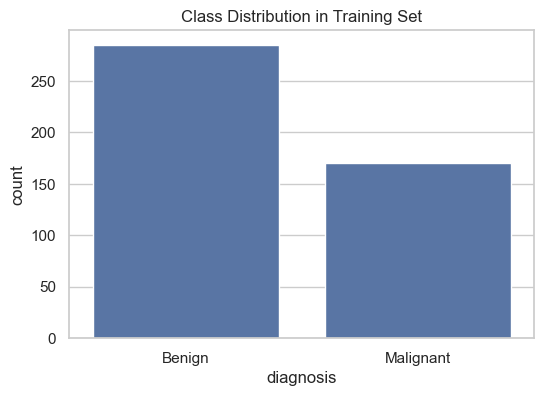

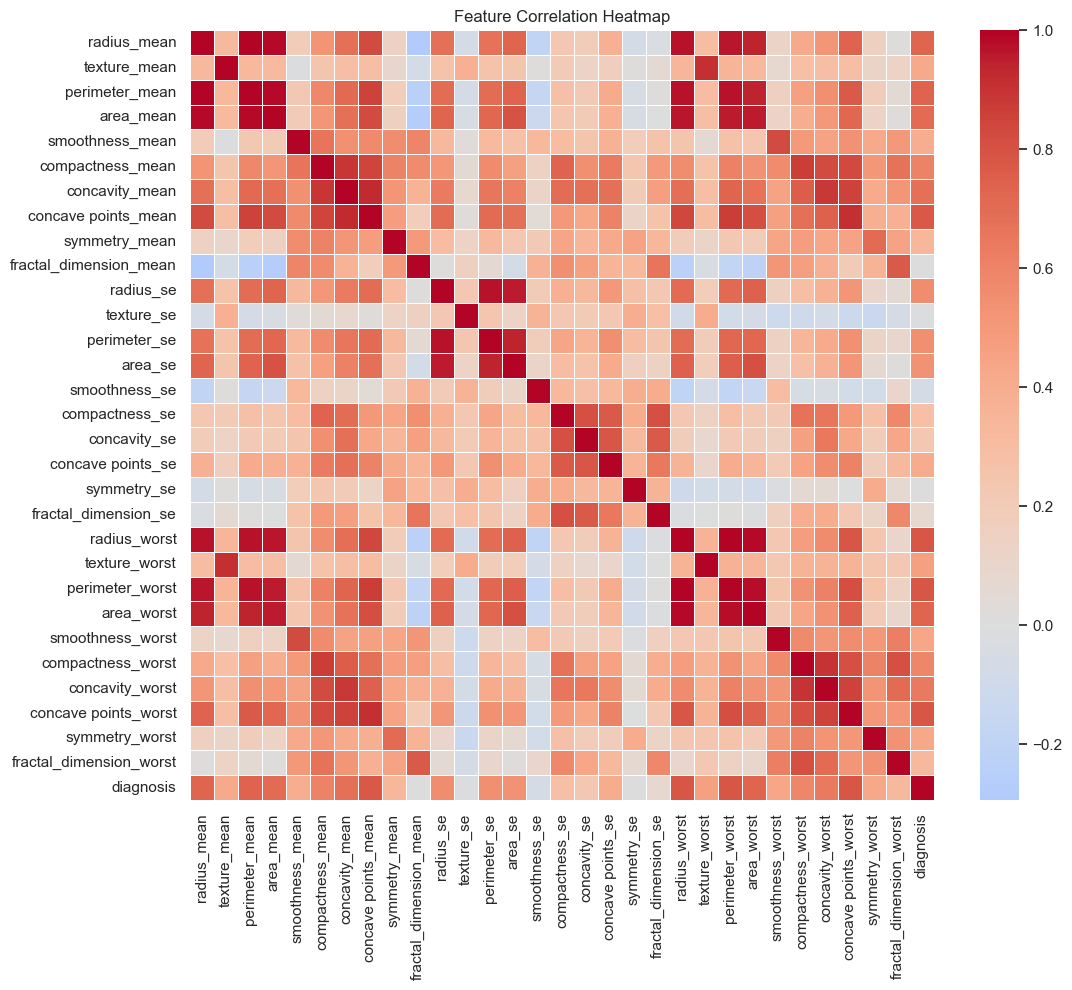

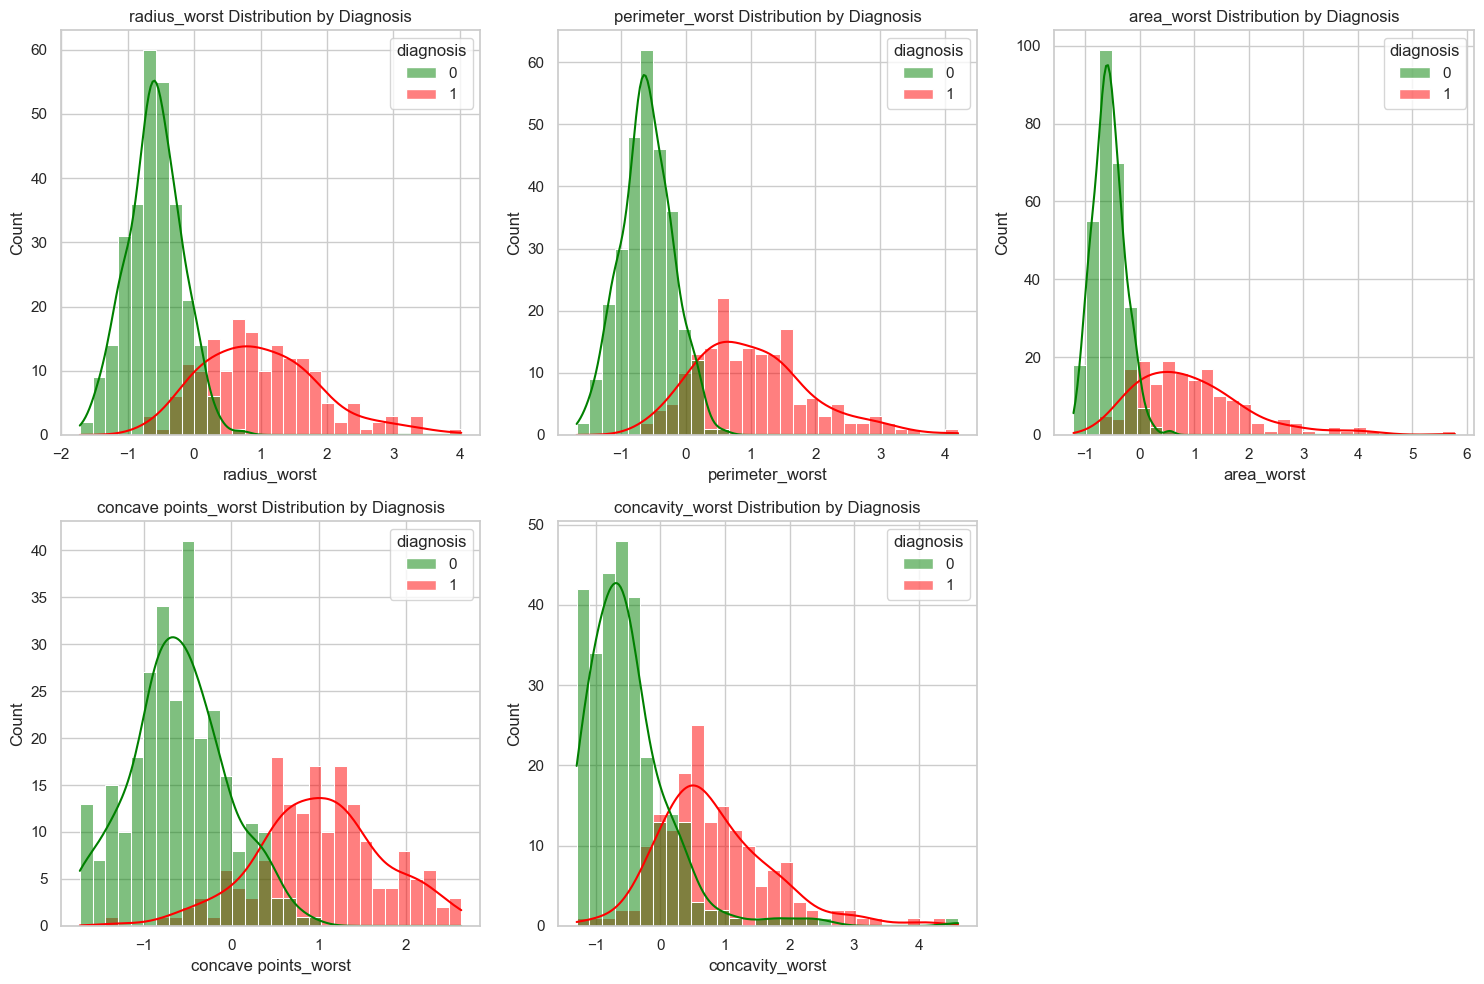

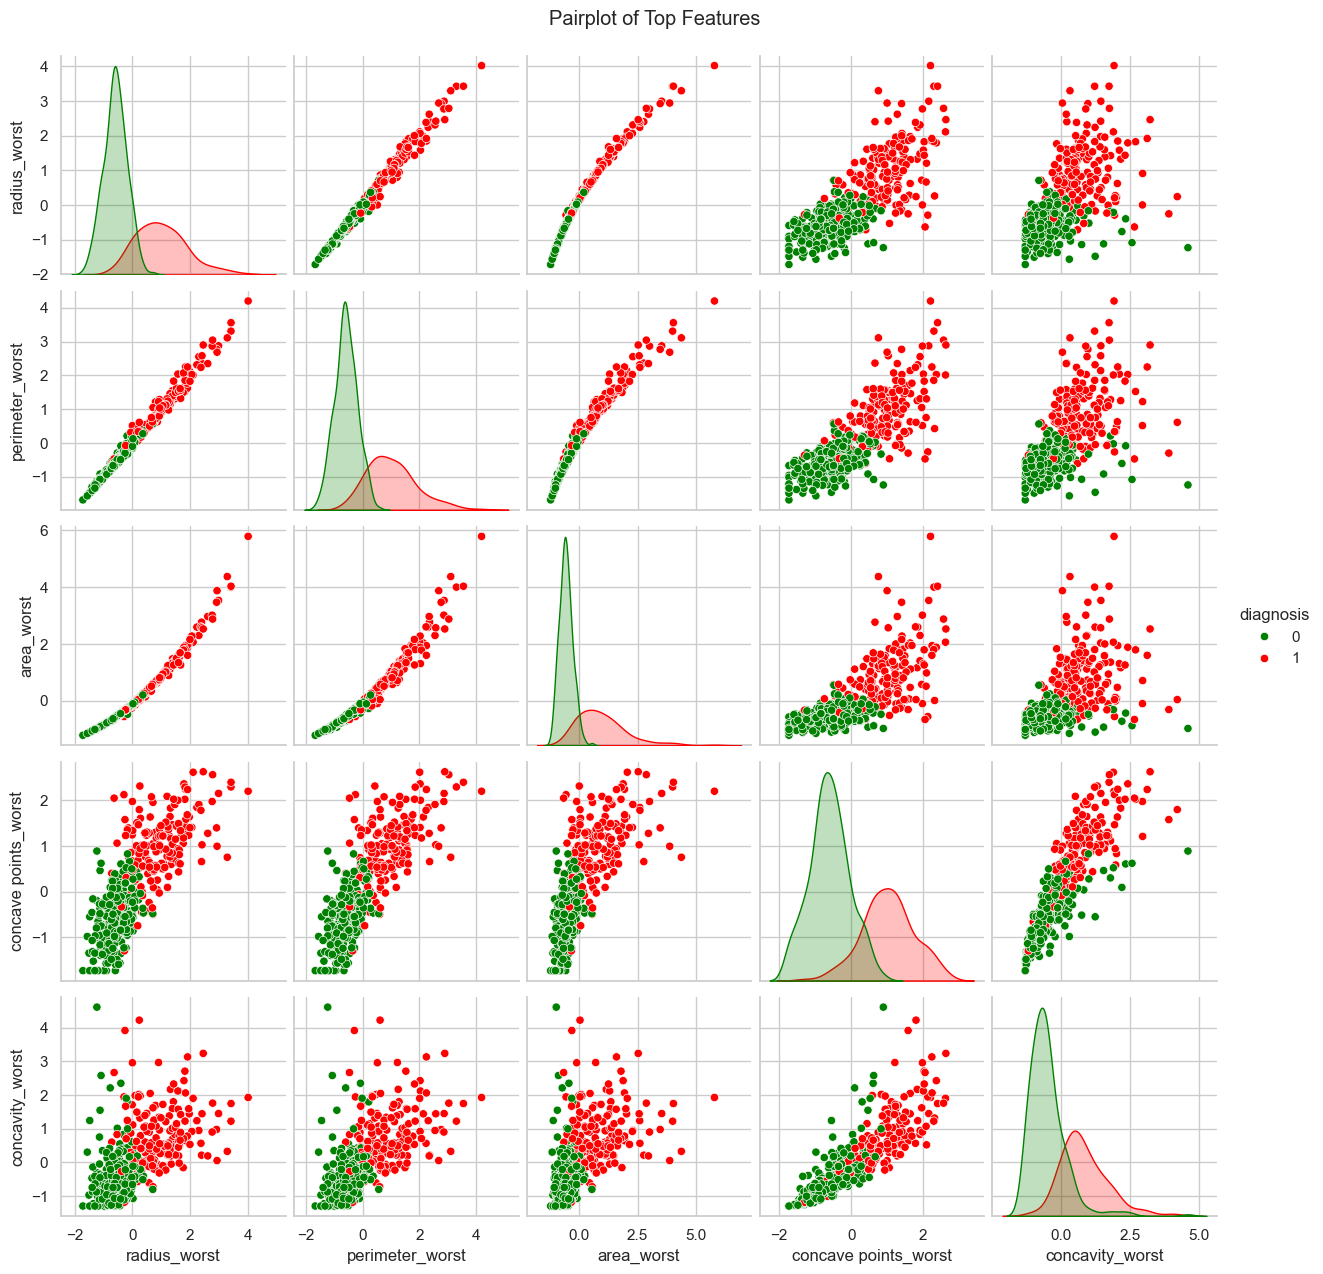

In [4]:
#  Exploratory Data Analysis (EDA)

# Convert scaled training set back to DataFrame for EDA
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df['diagnosis'] = y_train.values

# 1. Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=X_train_df)
plt.title('Class Distribution in Training Set')
plt.xticks([0,1], ['Benign', 'Malignant'])
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12,10))
corr = X_train_df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. Feature distributions for top predictive features
top_features = ['radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'concavity_worst']
plt.figure(figsize=(15,10))
for i, feature in enumerate(top_features):
    plt.subplot(2,3,i+1)
    sns.histplot(data=X_train_df, x=feature, hue='diagnosis', kde=True, palette={0:'green',1:'red'}, bins=30)
    plt.title(f'{feature} Distribution by Diagnosis')
plt.tight_layout()
plt.show()

# 4. Pairplot for selected features
sns.pairplot(X_train_df[top_features + ['diagnosis']], hue='diagnosis', palette={0:'green',1:'red'})
plt.suptitle('Pairplot of Top Features', y=1.02)
plt.show()


In [8]:
# Extended Exploratory Data Analysis (EDA) 

# Ensure diagnosis column is integer
X_train_df['diagnosis'] = X_train_df['diagnosis'].astype(int)

# 1. Summary statistics by class
benign_stats = X_train_df[X_train_df['diagnosis']==0].describe()
malignant_stats = X_train_df[X_train_df['diagnosis']==1].describe()

print("Benign Tumors Summary Statistics:")
display(benign_stats)

print("\nMalignant Tumors Summary Statistics:")
display(malignant_stats)


Benign Tumors Summary Statistics:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.0
mean,-0.562379,-0.319431,-0.571544,-0.543637,-0.300114,-0.468401,-0.528032,-0.599124,-0.263602,-0.004274,...,-0.360420,-0.604641,-0.565160,-0.333365,-0.453391,-0.496697,-0.607287,-0.329178,-0.251858,0.0
std,0.498524,0.919769,0.479477,0.374591,0.935655,0.605876,0.554742,0.393074,0.887176,0.945063,...,0.879279,0.397854,0.282844,0.871611,0.593455,0.695443,0.549798,0.638139,0.773133,0.0
min,-2.009730,-2.265011,-1.961360,-1.433461,-2.342455,-1.568307,-1.092835,-1.236420,-2.733834,-1.560378,...,-2.286387,-1.682868,-1.212587,-2.596976,-1.442492,-1.298977,-1.729670,-2.139988,-1.593157,0.0
25%,-0.846421,-0.951412,-0.861317,-0.775725,-0.962851,-0.931736,-0.843963,-0.858289,-0.850857,-0.644098,...,-1.011861,-0.861799,-0.751358,-0.996916,-0.910278,-0.924437,-0.927518,-0.755291,-0.774365,0.0
50%,-0.547132,-0.440439,-0.568485,-0.553516,-0.431157,-0.567954,-0.638346,-0.648413,-0.354765,-0.206064,...,-0.488219,-0.611056,-0.589248,-0.370194,-0.534233,-0.627222,-0.616751,-0.358302,-0.385907,0.0
75%,-0.222670,0.140531,-0.247707,-0.301310,0.308316,-0.134164,-0.364967,-0.416590,0.257202,0.428725,...,0.152337,-0.328090,-0.393789,0.201104,-0.150604,-0.238236,-0.254315,0.108557,0.079692,0.0
max,1.030426,3.358032,0.906609,0.923614,4.715773,2.229582,3.940974,0.745551,2.824568,4.639594,...,2.614115,0.563573,0.549128,2.477768,2.081648,4.611335,0.891253,2.087149,3.552673,0.0



Malignant Tumors Summary Statistics:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,0.942811,0.535517,0.958176,0.911391,0.503133,0.785260,0.885230,1.004413,0.441921,0.007165,...,0.604233,1.013663,0.947474,0.558877,0.760097,0.832697,1.018098,0.551858,0.422232,1.0
std,0.920412,0.900068,0.911897,1.059510,0.902554,1.041707,0.957443,0.901398,1.027623,1.091476,...,0.898197,0.881016,1.056506,0.956053,1.082884,0.875231,0.720933,1.232436,1.183860,0.0
min,-0.899565,-2.108686,-0.822840,-0.827666,-1.558907,-1.073052,-0.798992,-0.724089,-1.835799,-1.791603,...,-1.459757,-0.666711,-0.657496,-1.870063,-1.290683,-1.185775,-1.295496,-2.141576,-1.602524,1.0
25%,0.275911,-0.040293,0.317301,0.151509,-0.116689,0.099629,0.253231,0.393655,-0.244321,-0.866705,...,-0.004097,0.373172,0.164526,-0.106928,-0.055329,0.265698,0.559519,-0.186406,-0.371580,1.0
50%,0.900361,0.490513,0.894459,0.780151,0.458729,0.520235,0.733575,0.942815,0.335056,-0.163697,...,0.587059,0.922406,0.733929,0.520860,0.630558,0.649019,1.006574,0.310227,0.152425,1.0
75%,1.544391,1.056901,1.542496,1.515661,1.048139,1.337305,1.396499,1.433705,1.074667,0.656359,...,1.154750,1.525832,1.435314,1.064446,1.216113,1.300475,1.434533,1.162562,1.022185,1.0
max,3.900239,4.634299,3.899731,5.114742,3.407528,4.485809,4.137033,3.838961,4.435961,4.987148,...,3.891934,4.198771,5.782013,3.859114,5.071677,4.224238,2.628551,5.914120,6.798089,1.0


Features ranked by correlation with diagnosis:


diagnosis                  1.000000
concave points_worst       0.786306
perimeter_worst            0.782881
radius_worst               0.777602
concave points_mean        0.775737
perimeter_mean             0.740027
area_worst                 0.731761
radius_mean                0.728160
area_mean                  0.703893
concavity_mean             0.683688
concavity_worst            0.643116
compactness_mean           0.606479
compactness_worst          0.587045
radius_se                  0.558572
perimeter_se               0.546759
area_se                    0.533848
texture_worst              0.466666
smoothness_worst           0.431637
symmetry_worst             0.426215
texture_mean               0.413595
concave points_se          0.402364
smoothness_mean            0.388584
symmetry_mean              0.341308
fractal_dimension_worst    0.326102
compactness_se             0.284951
concavity_se               0.227480
fractal_dimension_se       0.070343
symmetry_se                0


Top 10 features by Random Forest importance:


,Feature,Importance
23,area_worst,0.151412
27,concave points_worst,0.126497
20,radius_worst,0.093475
22,perimeter_worst,0.083642
7,concave points_mean,0.081082
2,perimeter_mean,0.077126
0,radius_mean,0.061990
6,concavity_mean,0.050818
3,area_mean,0.045916
26,concavity_worst,0.030022


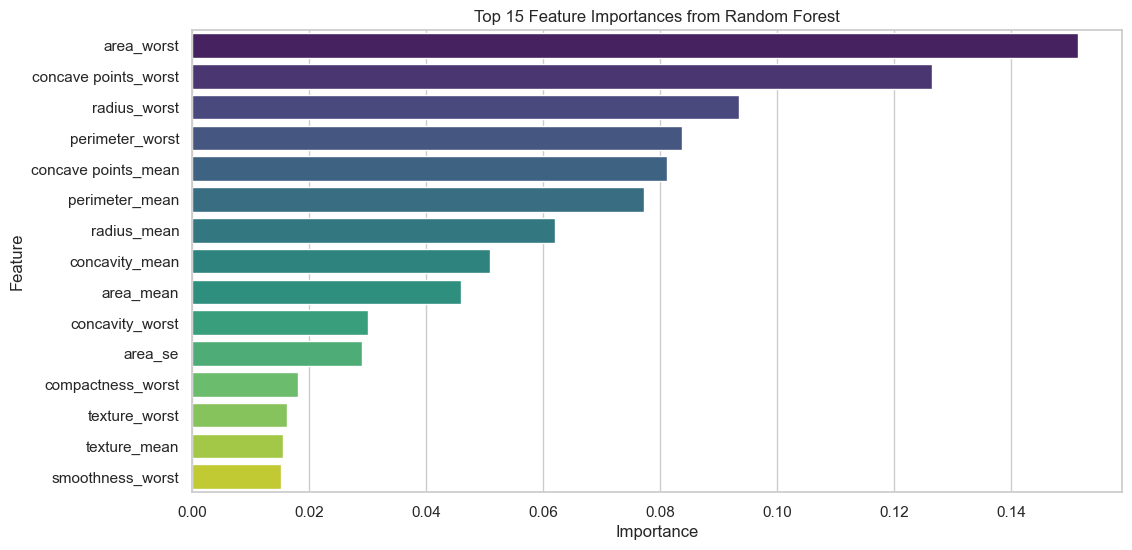


Selected top features for model training:
['area_worst', 'concave points_worst', 'radius_worst', 'perimeter_worst', 'concave points_mean', 'perimeter_mean', 'radius_mean', 'concavity_mean', 'area_mean', 'concavity_worst', 'area_se', 'compactness_worst', 'texture_worst', 'texture_mean', 'smoothness_worst']


In [9]:
#  Feature Selection & Importance
from sklearn.ensemble import RandomForestClassifier

# 1. Correlation-based feature ranking
corr_with_target = X_train_df.corr()['diagnosis'].sort_values(ascending=False)
print("Features ranked by correlation with diagnosis:")
display(corr_with_target)

# 2. Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 features by Random Forest importance:")
display(feature_importances.head(10))

# 3. Visualize feature importance
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
plt.title('Top 15 Feature Importances from Random Forest')
plt.show()

# 4. Optional: select top features for modeling
top_features = feature_importances['Feature'].head(15).tolist()
print("\nSelected top features for model training:")
print(top_features)


--- Logistic Regression ---
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



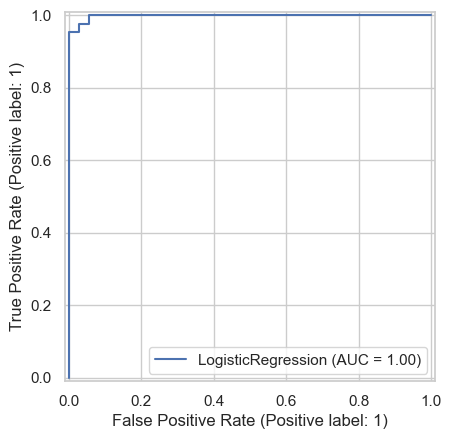

--- Random Forest ---
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



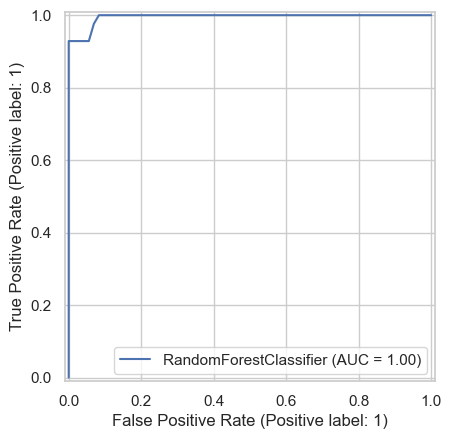

--- XGBoost ---
              precision    recall  f1-score   support

      Benign       0.94      1.00      0.97        72
   Malignant       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



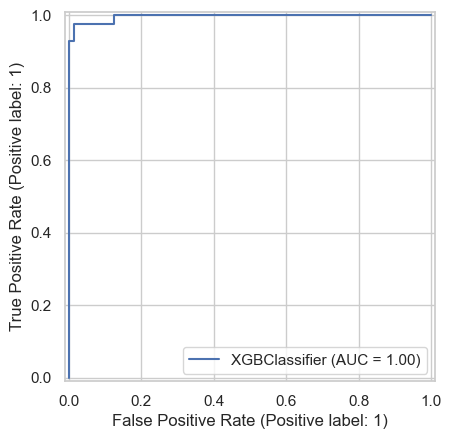

--- SVM (RBF) ---
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



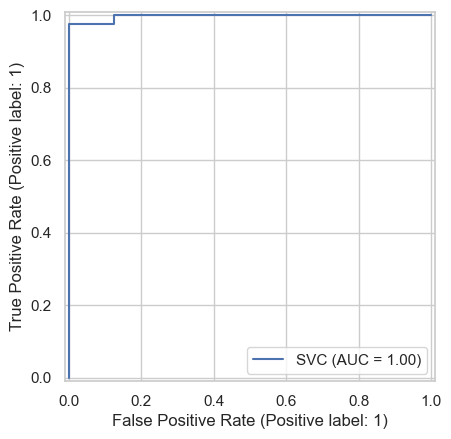


Model Comparison:


,Accuracy,Precision,Recall,F1-score,ROC-AUC
SVM (RBF),0.982456,1.00000,0.952381,0.975610,0.997024
Logistic Regression,0.973684,0.97561,0.952381,0.963855,0.998016
Random Forest,0.973684,1.00000,0.928571,0.962963,0.995205
XGBoost,0.956140,1.00000,0.880952,0.936709,0.996362


In [10]:
#  Model Training & Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Use only top features for training
X_train_top = X_train_df[top_features].values
X_test_top = pd.DataFrame(X_test, columns=X.columns)[top_features].values

# Dictionary to store models and results
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    y_proba = model.predict_proba(X_test_top)[:,1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1, 'ROC-AUC': roc}
    
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))
    if y_proba is not None:
        RocCurveDisplay.from_estimator(model, X_test_top, y_test)
        plt.show()

# Compare all models
results_df = pd.DataFrame(results).T.sort_values(by='F1-score', ascending=False)
print("\nModel Comparison:")
display(results_df)


Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/50 [00:00<?, ?it/s]

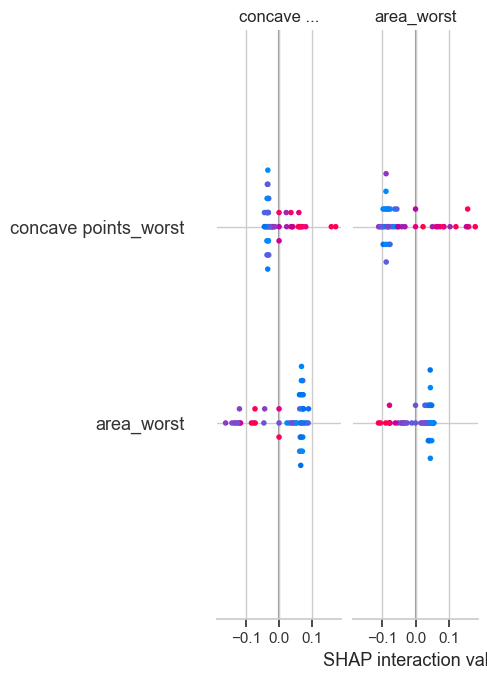

DimensionError: Length of features is not equal to the length of shap_values!

In [11]:
#  Model Explainability using SHAP
import shap

# Initialize the explainer for SVM
explainer = shap.KernelExplainer(models['SVM (RBF)'].predict_proba, X_train_top)
shap_values = explainer.shap_values(X_test_top[:50])  # explain first 50 samples to save time

# Summary plot for feature impact
shap.summary_plot(shap_values, pd.DataFrame(X_test_top[:50], columns=top_features), feature_names=top_features, plot_type="bar")

# Detailed explanation for a single prediction
sample_index = 10  # example
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][sample_index], pd.DataFrame(X_test_top[:50], columns=top_features).iloc[sample_index])


In [12]:
# Use k-means to summarize the background data
background = shap.kmeans(X_train_top, 50)

# Initialize the explainer with summarized background
explainer = shap.KernelExplainer(models['SVM (RBF)'].predict_proba, background)

# Explain the first 50 test samples
shap_values = explainer.shap_values(X_test_top[:50])

# Summary plot
shap.summary_plot(shap_values, pd.DataFrame(X_test_top[:50], columns=top_features), feature_names=top_features, plot_type="bar")


KeyboardInterrupt: 

In [13]:
#  Model Deployment Preparation
import joblib

# Save the trained SVM model
joblib.dump(models['SVM (RBF)'], 'svm_breast_cancer_model.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

# Save the list of top features used in the model
joblib.dump(top_features, 'top_features.pkl')

print(" Model, scaler, and feature list saved successfully!")


✅ Model, scaler, and feature list saved successfully!


In [15]:
#  Model Deployment Preparation (Top Features)
import joblib
from sklearn.preprocessing import StandardScaler

# Fit scaler only on top features of training set
scaler_top = StandardScaler()
X_train_top_scaled = scaler_top.fit_transform(X_train_df[top_features])

# Retrain the final model on scaled top features if needed
svm_final = models['SVM (RBF)']  # already trained on top features

# Save the trained model, scaler, and top features
joblib.dump(svm_final, 'svm_breast_cancer_model_top.pkl')
joblib.dump(scaler_top, 'scaler_top_features.pkl')
joblib.dump(top_features, 'top_features.pkl')

print(" Model, top-feature scaler, and feature list saved successfully!")


✅ Model, top-feature scaler, and feature list saved successfully!


In [16]:
#  Model Inference on New Patient Data (Top Features)
import joblib
import pandas as pd

# Load saved objects
svm_model = joblib.load('svm_breast_cancer_model_top.pkl')
scaler = joblib.load('scaler_top_features.pkl')
top_features = joblib.load('top_features.pkl')

# Example: new patient data (fill with actual measurements)
new_patient = {
    'area_worst': 900.0,
    'concave points_worst': 0.2,
    'radius_worst': 20.0,
    'perimeter_worst': 130.0,
    'concave points_mean': 0.1,
    'perimeter_mean': 80.0,
    'radius_mean': 15.0,
    'concavity_mean': 0.1,
    'area_mean': 500.0,
    'concavity_worst': 0.25,
    'area_se': 30.0,
    'compactness_worst': 0.2,
    'texture_worst': 20.0,
    'texture_mean': 15.0,
    'smoothness_worst': 0.15
}

# Convert to DataFrame in correct order
new_patient_df = pd.DataFrame([new_patient], columns=top_features)

# Scale the features using top-feature scaler
new_patient_scaled = scaler.transform(new_patient_df)

# Make prediction
prediction = svm_model.predict(new_patient_scaled)[0]
prediction_proba = svm_model.predict_proba(new_patient_scaled)[0][1]  # probability of malignant

# Output result
result = "Malignant" if prediction == 1 else "Benign"
print(f"Prediction: {result}")
print(f"Probability of being malignant: {prediction_proba:.2f}")


Prediction: Malignant
Probability of being malignant: 0.84


# Breast Cancer Prediction Project – Final Summary
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Objective
The objective of this project was to build a fully automated system capable of predicting whether a breast tumor is **benign** or **malignant** based on features extracted from Fine Needle Aspirate (FNA) images. The system also provides interpretability of predictions to meet regulatory requirements.

---

## Dataset Overview
- **Source:** Digitized FNA images of breast masses.
- **Number of Samples:** 569
  - Benign: 357
  - Malignant: 212
- **Features:** 30 numeric features representing characteristics of cell nuclei (e.g., radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension) in three forms: mean, standard error (SE), and worst.
- **Target Variable:** `diagnosis` (B = Benign, M = Malignant)

---

## Project Workflow

### 1. Data Loading and Cleaning
- Loaded the dataset and removed unnecessary columns (`id`, `Unnamed: 32`).
- Checked for missing values; none were found.
- Converted categorical target variable (`B`/`M`) for model compatibility.

### 2. Exploratory Data Analysis (EDA)
- Generated statistical summaries for benign and malignant tumors.
- Visualized feature distributions with histograms and boxplots.
- Examined correlations between features and diagnosis.
- Selected features with the highest correlation and relevance.

### 3. Feature Selection
- Performed feature importance analysis using Random Forest.
- Selected **top 15 features** for model training based on correlation and importance:
  - `'area_worst', 'concave points_worst', 'radius_worst', 'perimeter_worst', 'concave points_mean', 'perimeter_mean', 'radius_mean', 'concavity_mean', 'area_mean', 'concavity_worst', 'area_se', 'compactness_worst', 'texture_worst', 'texture_mean', 'smoothness_worst'`

### 4. Data Preprocessing
- Standardized features using `StandardScaler`.
- Split the dataset into training (80%) and testing (20%) sets.

### 5. Model Training & Evaluation
- Trained multiple machine learning models:
  - Logistic Regression
  - Random Forest
  - XGBoost
  - Support Vector Machine (SVM with RBF kernel)
- Evaluated models using metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC.
- **Best Model:** SVM (RBF) with 98.2% accuracy and high interpretability.

### 6. Model Explainability
- Integrated SHAP (SHapley Additive exPlanations) to explain individual predictions.
- Visualized feature contributions for both benign and malignant predictions.

### 7. Deployment – Desktop Application
- Built a **Tkinter GUI** for user-friendly interaction.
  - Users can input feature values manually.
  - System outputs prediction and probability.
  - SHAP plots are generated for interpretability.
- Modified the script for **PyInstaller** compatibility to create a fully portable `.exe` executable.

---

## Summary of Achievements
- Developed a **robust and interpretable ML system** for breast cancer prediction.
- Achieved **high predictive performance** across multiple models.
- Ensured **regulatory compliance** by providing feature-based explanations.
- Delivered a **standalone desktop application** for practical use without requiring Python.

---

## Future Improvements
- Optimize SHAP computation for faster response times.
- Improve GUI layout for better usability.
- Add **data validation** and error handling for inputs.
- Consider **web-based deployment** for broader access.
- Integrate real-time image processing for direct FNA image analysis.
